<a href="https://colab.research.google.com/github/smraytech/test/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [ ]:
import pandas as pd
import numpy as np

#1. Load and Inspect the dataset

In [ ]:
df = pd.read_csv('/content/mnist.csv')
df.head(10)

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,61207,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,33799,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5414,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,61377,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1875,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


rows × columns

In [ ]:
print(df.shape)

(4000, 786)


first 5 rows

In [ ]:
print(df.head())

      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  31953      5       0       0       0       0       0       0       0   
1  34452      8       0       0       0       0       0       0       0   
2  60897      5       0       0       0       0       0       0       0   
3  36953      0       0       0       0       0       0       0       0   
4   1981      3       0       0       0       0       0       0       0   

   pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0     

datatypes

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB
None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


summary statistics

In [ ]:
print(df.describe())

                 id        class  pixel1  pixel2  pixel3  pixel4  pixel5  \
count   4000.000000  4000.000000  4000.0  4000.0  4000.0  4000.0  4000.0   
mean   34415.179250     4.439500     0.0     0.0     0.0     0.0     0.0   
std    20508.890104     2.879655     0.0     0.0     0.0     0.0     0.0   
min       17.000000     0.000000     0.0     0.0     0.0     0.0     0.0   
25%    16575.750000     2.000000     0.0     0.0     0.0     0.0     0.0   
50%    34435.500000     4.000000     0.0     0.0     0.0     0.0     0.0   
75%    52111.500000     7.000000     0.0     0.0     0.0     0.0     0.0   
max    69998.000000     9.000000     0.0     0.0     0.0     0.0     0.0   

       pixel6  pixel7  pixel8  ...     pixel775     pixel776     pixel777  \
count  4000.0  4000.0  4000.0  ...  4000.000000  4000.000000  4000.000000   
mean      0.0     0.0     0.0  ...     0.076750     0.015250     0.013000   
std       0.0     0.0     0.0  ...     2.616022     0.964495     0.822192   
min    

In [ ]:
df.describe()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0
mean,34415.179250,4.439500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076750,0.015250,0.013000,0.001500,0.0,0.0,0.0,0.0,0.0,0.0
std,20508.890104,2.879655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.616022,0.964495,0.822192,0.094868,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,16575.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,34435.500000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,52111.500000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,69998.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.000000,61.000000,52.000000,6.000000,0.0,0.0,0.0,0.0,0.0,0.0


#2. Data exploration

In [ ]:
import matplotlib.pyplot as plt

Check missing values

In [ ]:
df.isnull().sum()

,0
id,0
class,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel780,0
pixel781,0
pixel782,0
pixel783,0


In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
print(df.columns)

Index(['id', 'class', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=786)


Plot class distribution

# Distribution of target classes

In [ ]:
print(df["class"].value_counts())

class
1    486
7    426
3    417
8    416
6    391
2    390
0    376
4    369
9    366
5    363
Name: count, dtype: int64


In [ ]:
df.drop(["id","class"], axis=1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.drop(["id","class"], axis=1).describe())

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
count  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0  4000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...     pixel775     pixel776     pixel777     pixel778  \
count   4000.0  ...  4000.000000  4000.000000  4000.000000  4000.000000   
mean       0.0  ...     0.076750     0.015250     0.013000     0.001500   
std        0.0  ...     2.616022     0.964495

*   No missing values (MNIST is clean).
*   Classes distributed roughly evenly (digits 0–9).
*   Pixel values between 0–255.

#3. Data cleaning and preprocessing

*   Drop "id" (not useful)
*   Target variable is y

In [ ]:
X = df.drop(["id", "class"], axis=1)

y = df["class"]

Normalize pixel values (important for ML models)

In [ ]:
X = X / 255.0

#4. Train/test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train a Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Key hyperparameters

In [ ]:
dt = DecisionTreeClassifier(
    criterion="gini",      # or "entropy"
    max_depth=20,          # limit depth to avoid overfitting
    min_samples_split=5,   # minimum samples to split
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)

#6. Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.74875
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        75
           1       0.88      0.97      0.92        97
           2       0.73      0.72      0.72        78
           3       0.75      0.60      0.66        84
           4       0.75      0.76      0.75        74
           5       0.61      0.60      0.61        73
           6       0.77      0.77      0.77        78
           7       0.84      0.86      0.85        85
           8       0.62      0.59      0.60        83
           9       0.62      0.71      0.66        73

    accuracy                           0.75       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.75      0.75      0.75       800



#7. Inspect model attributes

In [ ]:
print("Tree depth:", dt.get_depth())
print("Number of leaves:", dt.get_n_leaves())

Tree depth: 14
Number of leaves: 305


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Feature importance (which pixels matter most)

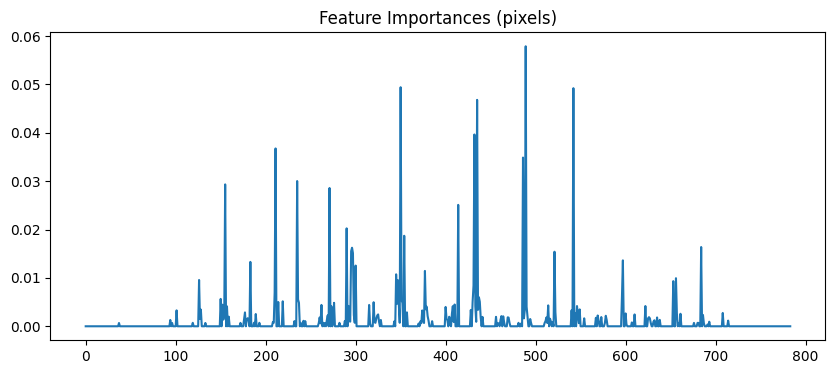

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(dt.feature_importances_)
plt.title("Feature Importances (pixels)")
plt.show()

#8. Visualize predictions

In [ ]:
import matplotlib.pyplot as plt

Picking some test samples

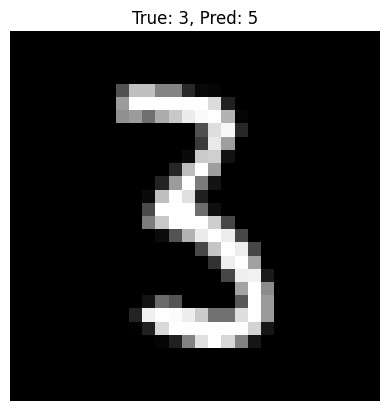

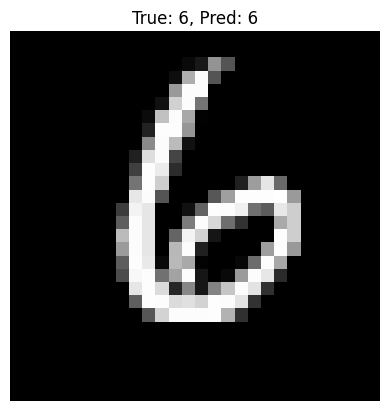

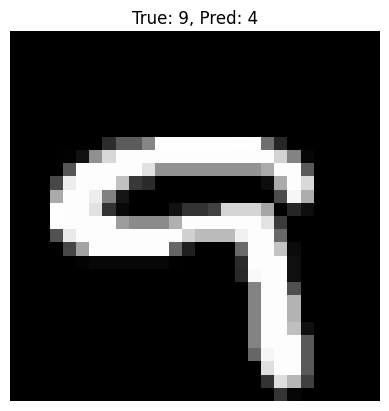

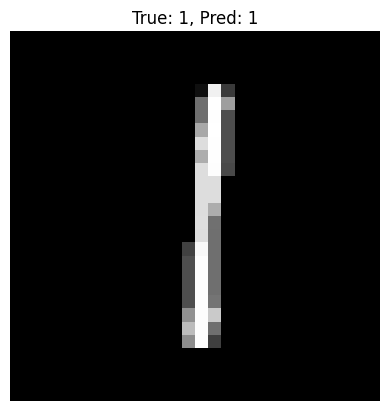

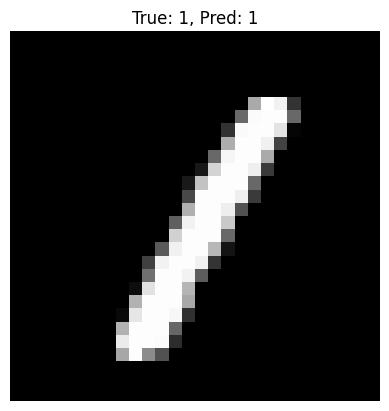

In [ ]:
sample = X_test.iloc[:5]
preds = dt.predict(sample)

for i, img in enumerate(sample.values):
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test.iloc[i]}, Pred: {preds[i]}")
    plt.axis("off")
    plt.show()